## Model for Banking system and  Detection

In this project you will predict probabilities of a loan application going bad with the help of Machine learning models. Please import the following libraries to get started.

The analysis is divided into four main parts:
1. Data understanding 
2. Data cleaning (cleaning missing values, removing redundant columns etc.)
3. Data Analysis 
4. Recommendations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

from sklearn import metrics
from sklearn import preprocessing

def print_ln():
    print('-'*80, '\n')

## Data Exploration 

In [2]:
#df = pd.read_csv('../input/Capstone-CC/creditcard.csv')
#df=pd.read_csv('bank.csv',encoding='cp1252')
#pd.read_csv('lo')
#df.head()
import os
import pandas as pd
cwd = os.path.abspath('') 
files = os.listdir(cwd) 

In [3]:
## As a given dataset has 3 sheets within excel sheet.
df1 = pd.read_excel('bank.xlsx', sheet_name="person data")
df2 = pd.read_excel('bank.xlsx', sheet_name="loan data")
df3 = pd.read_excel('bank.xlsx', sheet_name="transaction data")
df1
df2
df3

,TRN_DT,Person_ID,TRANS_TYPE,AMOUNT_IN_NAIRA,NARRATION
0,2019-05-06,82801,Credit,70000.0,Cash Deposit######@xxxxxxx by xxxxxxx
1,2019-05-06,82801,Credit,10000.0,UIP Trf from xxxxxxxxxxxxxxxxxxxxxx
2,2019-05-08,82801,Debit,15000.0,AWR@12140030/FCMB PH-Main Br PH ...
3,2019-05-08,82801,Debit,15000.0,AWR@12140030/FCMB PH-Main Br PH ...
4,2019-05-08,82801,Debit,10000.0,AWR@12140030/FCMB PH-Main Br PH ...
...,...,...,...,...,...
608720,2019-12-20,8977774,Debit,3500.0,MANAGEMENT FEE
608721,2019-12-20,8977774,Debit,96000.0,Mobile Transfer to xxxxxxxxxxxx
608722,2019-12-20,8977774,Debit,75000.0,MOBILE/BANK Transfer to xxxxxxxxxx
608723,2019-12-20,8977774,Debit,175.0,VAT ON MANAGEMENT FEE


In [8]:
df1

,Person_ID,Loan Account Number,Relationship_Start_Date,OCCUPATION,DATE_OF_BIRTH,BUSINESS_TYPE,STATE,No_of_Mobile_No,CUSTOMER_EMAIL,GENDER,MARITAL_STATUS,REGION,BASIC_CURRENT,BASIC_SAVINGS,ATMCARD,TOTAL_PRODUCTS
0,8671296,346Z700193290001,2019-02-12,NaN,1970-12-31,NaN,Kwara,1,N,M,Married,NORTH,N,N,Y,0
1,4650228,347Z700193320501,2009-09-28,NaN,1969-02-05,BUSINESS,PLATEAU,1,N,M,0,NORTH,N,N,Y,1
2,8368795,065Z700193300001,2018-11-16,OTHERS,1970-11-14,NaN,ONDO,1,N,M,0,WEST,N,N,Y,0
3,7069330,632Z700193260001,2017-10-06,FARMING,1962-02-15,1,Plateau,2,N,M,Married,NORTH,N,N,Y,1
4,7282857,585Z700193330001,2017-12-29,NaN,1977-11-11,NaN,Kogi,1,N,F,Married,SOUTH,N,N,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,8421669,408Z700193380001,2018-11-30,CIVIL SERVANT,1981-12-15,1,Lagos,1,Y,M,Married,LAGOS_ISLAND,N,N,Y,2
2589,7579196,235Z700193310001,2018-04-10,Artisan,1982-03-24,1,Oyo,2,Y,M,Married,WEST,Y,N,Y,4
2590,6518178,282Z700193260001,2016-12-14,1,1989-12-24,1,Edo,1,Y,M,Single,WEST,N,N,N,6
2591,8407071,182Z700193330001,2018-11-26,NaN,1979-10-28,NaN,Enugu,1,N,M,Married,SOUTH,N,N,Y,2


In [9]:
df2

,Person_ID,Loan_ID,Loan Tenure,Payment Period,Loan Amount (Principal),Loan Application Date,Loan Approval Date,Loan Disbursement Date,Loan Maturity Date,Latest Known Status,Ever 90dpd+,Currently ≥ 60dpd,Bad Indicator
0,4664654,264Z700192670001,12,Monthly,81000,2019-09-24,2019-09-24,2019-09-24,2020-09-25,Current (active no arrears),0.0,0.0,0.0
1,5522372,458Z700192690001,12,Monthly,47000,2019-09-26,2019-09-26,2019-09-26,2020-09-25,Current (active no arrears),0.0,0.0,0.0
2,7749646,609Z700192690002,12,Monthly,53000,2019-09-26,2019-09-26,2019-09-26,2020-09-25,Current (active no arrears),0.0,0.0,0.0
3,8450062,317Z700192700001,12,Monthly,62000,2019-09-27,2019-09-27,2019-09-27,2020-09-30,Current (active no arrears),0.0,0.0,0.0
4,5518276,235Z700192730001,6,Monthly,89000,2019-09-30,2019-09-30,2019-09-30,2020-03-30,Closed (fully repaid),0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,7366545,321Z700193540001,12,Monthly,350000,2019-12-20,2019-12-20,2019-12-20,2020-12-24,NaN,NaN,NaN,NaN
2589,8208065,557Z700193570001,12,Monthly,120000,2019-12-23,2019-12-23,2019-12-23,2020-12-30,NaN,NaN,NaN,NaN
2590,6243252,233Z700193580001,12,Monthly,99000,2019-12-24,2019-12-24,2019-12-24,2020-12-30,NaN,NaN,NaN,NaN
2591,5926348,500Z700193610001,9,Monthly,149000,2019-12-27,2019-12-27,2019-12-27,2020-09-30,NaN,NaN,NaN,NaN


In [10]:
df3

,TRN_DT,Person_ID,TRANS_TYPE,AMOUNT_IN_NAIRA,NARRATION
0,2019-05-06,82801,Credit,70000.0,Cash Deposit######@xxxxxxx by xxxxxxx
1,2019-05-06,82801,Credit,10000.0,UIP Trf from xxxxxxxxxxxxxxxxxxxxxx
2,2019-05-08,82801,Debit,15000.0,AWR@12140030/FCMB PH-Main Br PH ...
3,2019-05-08,82801,Debit,15000.0,AWR@12140030/FCMB PH-Main Br PH ...
4,2019-05-08,82801,Debit,10000.0,AWR@12140030/FCMB PH-Main Br PH ...
...,...,...,...,...,...
608720,2019-12-20,8977774,Debit,3500.0,MANAGEMENT FEE
608721,2019-12-20,8977774,Debit,96000.0,Mobile Transfer to xxxxxxxxxxxx
608722,2019-12-20,8977774,Debit,75000.0,MOBILE/BANK Transfer to xxxxxxxxxx
608723,2019-12-20,8977774,Debit,175.0,VAT ON MANAGEMENT FEE


In [14]:
### We are creating a final frame to merge all there sheets as df1,df2 and df3 as df on person id
#df = pd.merge(df1, df2, df3, on='Person_ID', how='inner')
#df = df1.merge(df2,on='Person_ID').merge(df3,on='Person_ID')
merged_df = pd.merge(df1,df2, how='inner', on='Person_ID')
df = pd.merge(merged_df, df3, on='Person_ID', how='inner')
df

,Person_ID,Loan Account Number,Relationship_Start_Date,OCCUPATION,DATE_OF_BIRTH,BUSINESS_TYPE,STATE,No_of_Mobile_No,CUSTOMER_EMAIL,GENDER,...,Loan Disbursement Date,Loan Maturity Date,Latest Known Status,Ever 90dpd+,Currently ≥ 60dpd,Bad Indicator,TRN_DT,TRANS_TYPE,AMOUNT_IN_NAIRA,NARRATION
0,8671296,346Z700193290001,2019-02-12,NaN,1970-12-31,NaN,Kwara,1,N,M,...,2019-11-25,2020-12-04,In Default,1.0,1.0,1.0,2019-05-30,Credit,20000.0,Cash Deposit######@xxxxxxx by xxxxxxx
1,8671296,346Z700193290001,2019-02-12,NaN,1970-12-31,NaN,Kwara,1,N,M,...,2019-11-25,2020-12-04,In Default,1.0,1.0,1.0,2019-05-31,Debit,10000.0,AWR@10323465/AHMADU BELLO KAD 5 KADUNA ...
2,8671296,346Z700193290001,2019-02-12,NaN,1970-12-31,NaN,Kwara,1,N,M,...,2019-11-25,2020-12-04,In Default,1.0,1.0,1.0,2019-05-31,Debit,10000.0,AWR@10323465/AHMADU BELLO KAD 5 KADUNA ...
3,8671296,346Z700193290001,2019-02-12,NaN,1970-12-31,NaN,Kwara,1,N,M,...,2019-11-25,2020-12-04,In Default,1.0,1.0,1.0,2019-05-31,Credit,85000.0,UIP Trf from xxxxxxxxxxxxxxxxxxxxxx
4,8671296,346Z700193290001,2019-02-12,NaN,1970-12-31,NaN,Kwara,1,N,M,...,2019-11-25,2020-12-04,In Default,1.0,1.0,1.0,2019-05-31,Debit,10000.0,USSD/Transfer to xxxxxxxxxx from xxxxxxxxxxx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608720,5540382,267Z700193250001,2013-11-07,1,1966-08-28,1,OSUN,1,N,M,...,2019-11-21,2020-11-30,Current (active no arrears),0.0,0.0,0.0,2019-11-20,Debit,15000.0,POS@2057GT98/TEAMAPT LIMITED LA ...
608721,5540382,267Z700193250001,2013-11-07,1,1966-08-28,1,OSUN,1,N,M,...,2019-11-21,2020-11-30,Current (active no arrears),0.0,0.0,0.0,2019-11-21,Debit,855.0,INSURANCE FEE
608722,5540382,267Z700193250001,2013-11-07,1,1966-08-28,1,OSUN,1,N,M,...,2019-11-21,2020-11-30,Current (active no arrears),0.0,0.0,0.0,2019-11-21,Debit,950.0,MANAGEMENT FEE
608723,5540382,267Z700193250001,2013-11-07,1,1966-08-28,1,OSUN,1,N,M,...,2019-11-21,2020-11-30,Current (active no arrears),0.0,0.0,0.0,2019-11-21,Debit,47.5,VAT ON MANAGEMENT FEE


In [12]:
df.columns

Index(['Person_ID', 'Loan Account Number', 'Relationship_Start_Date',
       'OCCUPATION', 'DATE_OF_BIRTH', 'BUSINESS_TYPE', 'STATE',
       'No_of_Mobile_No', 'CUSTOMER_EMAIL', 'GENDER', 'MARITAL_STATUS',
       'REGION', 'BASIC_CURRENT', 'BASIC_SAVINGS', 'ATMCARD', 'TOTAL_PRODUCTS',
       'Loan_ID', 'Loan Tenure', 'Payment Period', 'Loan Amount (Principal)',
       'Loan Application Date', 'Loan Approval Date', 'Loan Disbursement Date',
       'Loan Maturity Date', 'Latest Known Status', 'Ever 90dpd+',
       'Currently ≥ 60dpd', 'Bad Indicator', 'TRN_DT', 'TRANS_TYPE',
       'AMOUNT_IN_NAIRA', 'NARRATION'],
      dtype='object')

In [15]:
len(df.columns)

32

In [16]:
df.shape

(608725, 32)

In [17]:
len(df.keys().values)

32

In [18]:
df.values

array([[8671296, '346Z700193290001', Timestamp('2019-02-12 00:00:00'),
        ..., 'Credit', 20000.0, 'Cash Deposit######@xxxxxxx by xxxxxxx'],
       [8671296, '346Z700193290001', Timestamp('2019-02-12 00:00:00'),
        ..., 'Debit', 10000.0,
        'AWR@10323465/AHMADU BELLO KAD 5     KADUNA       KDNG'],
       [8671296, '346Z700193290001', Timestamp('2019-02-12 00:00:00'),
        ..., 'Debit', 10000.0,
        'AWR@10323465/AHMADU BELLO KAD 5     KADUNA       KDNG'],
       ...,
       [5540382, '267Z700193250001', Timestamp('2013-11-07 00:00:00'),
        ..., 'Debit', 950.0, 'MANAGEMENT FEE'],
       [5540382, '267Z700193250001', Timestamp('2013-11-07 00:00:00'),
        ..., 'Debit', 47.5, 'VAT ON MANAGEMENT FEE'],
       [5540382, '267Z700193250001', Timestamp('2013-11-07 00:00:00'),
        ..., 'Credit', 95000.0, 'LOAN DISBURSEMENT']], dtype=object)

In [19]:
len(df.values)

608725

In [20]:
type(df.values)

numpy.ndarray

In [21]:
df.describe()

,Person_ID,No_of_Mobile_No,TOTAL_PRODUCTS,Loan Tenure,Loan Amount (Principal),Ever 90dpd+,Currently ≥ 60dpd,Bad Indicator,AMOUNT_IN_NAIRA
count,6.087250e+05,608725.000000,608725.000000,608725.000000,608725.000000,448196.000000,448196.000000,448196.000000,6.087250e+05
mean,6.357631e+06,1.076836,1.919878,11.238265,227261.920391,0.227447,0.309295,0.318307,2.738425e+04
std,2.001543e+06,0.266331,2.531561,2.127839,122958.647868,0.419184,0.462204,0.465820,1.226310e+05
min,8.280100e+04,1.000000,0.000000,2.000000,10000.000000,0.000000,0.000000,0.000000,-5.000000e+05
25%,5.303229e+06,1.000000,0.000000,12.000000,145000.000000,0.000000,0.000000,0.000000,1.000000e+03
50%,6.695806e+06,1.000000,1.000000,12.000000,149000.000000,0.000000,0.000000,0.000000,6.000000e+03
75%,8.012117e+06,1.000000,3.000000,12.000000,350000.000000,0.000000,1.000000,1.000000,2.000000e+04
max,8.977774e+06,2.000000,45.000000,24.000000,1000000.000000,1.000000,1.000000,1.000000,3.040000e+07


In [22]:
df.info()
type(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608725 entries, 0 to 608724
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Person_ID                608725 non-null  int64         
 1   Loan Account Number      608725 non-null  object        
 2   Relationship_Start_Date  608725 non-null  datetime64[ns]
 3   OCCUPATION               421161 non-null  object        
 4   DATE_OF_BIRTH            608725 non-null  datetime64[ns]
 5   BUSINESS_TYPE            312170 non-null  object        
 6   STATE                    608725 non-null  object        
 7   No_of_Mobile_No          608725 non-null  int64         
 8   CUSTOMER_EMAIL           608725 non-null  object        
 9   GENDER                   608725 non-null  object        
 10  MARITAL_STATUS           608725 non-null  object        
 11  REGION                   608725 non-null  object        
 12  BASIC_CURRENT   

pandas.core.frame.DataFrame

In [24]:
from datetime import date
df["TRN_DT"].dtype

dtype('<M8[ns]')

In [25]:
print(df.isnull().sum())

Person_ID                       0
Loan Account Number             0
Relationship_Start_Date         0
OCCUPATION                 187564
DATE_OF_BIRTH                   0
BUSINESS_TYPE              296555
STATE                           0
No_of_Mobile_No                 0
CUSTOMER_EMAIL                  0
GENDER                          0
MARITAL_STATUS                  0
REGION                          0
BASIC_CURRENT                   0
BASIC_SAVINGS                   0
ATMCARD                         0
TOTAL_PRODUCTS                  0
Loan_ID                         0
Loan Tenure                     0
Payment Period                  0
Loan Amount (Principal)         0
Loan Application Date           0
Loan Approval Date              0
Loan Disbursement Date          0
Loan Maturity Date              0
Latest Known Status        160529
Ever 90dpd+                160529
Currently ≥ 60dpd          160529
Bad Indicator              160529
TRN_DT                          0
TRANS_TYPE    

In [27]:
## percentage of missing values in each column
print(round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False))
colmns_missing_data = round(100*(df.isnull().sum()/len(df.index)), 2)
colmns_missing_data[colmns_missing_data >= 10]

BUSINESS_TYPE              48.72
OCCUPATION                 30.81
Currently ≥ 60dpd          26.37
Bad Indicator              26.37
Latest Known Status        26.37
Ever 90dpd+                26.37
NARRATION                   0.02
TRN_DT                      0.00
Loan Tenure                 0.00
TRANS_TYPE                  0.00
AMOUNT_IN_NAIRA             0.00
Loan Maturity Date          0.00
Loan Disbursement Date      0.00
Loan Approval Date          0.00
Loan Application Date       0.00
Loan Amount (Principal)     0.00
Payment Period              0.00
Person_ID                   0.00
Loan Account Number         0.00
TOTAL_PRODUCTS              0.00
ATMCARD                     0.00
BASIC_SAVINGS               0.00
BASIC_CURRENT               0.00
REGION                      0.00
MARITAL_STATUS              0.00
GENDER                      0.00
CUSTOMER_EMAIL              0.00
No_of_Mobile_No             0.00
STATE                       0.00
DATE_OF_BIRTH               0.00
Relationsh

OCCUPATION             30.81
BUSINESS_TYPE          48.72
Latest Known Status    26.37
Ever 90dpd+            26.37
Currently ≥ 60dpd      26.37
Bad Indicator          26.37
dtype: float64

In [28]:
df.dtypespes

Person_ID                           int64
Loan Account Number                object
Relationship_Start_Date    datetime64[ns]
OCCUPATION                         object
DATE_OF_BIRTH              datetime64[ns]
BUSINESS_TYPE                      object
STATE                              object
No_of_Mobile_No                     int64
CUSTOMER_EMAIL                     object
GENDER                             object
MARITAL_STATUS                     object
REGION                             object
BASIC_CURRENT                      object
BASIC_SAVINGS                      object
ATMCARD                            object
TOTAL_PRODUCTS                      int64
Loan_ID                            object
Loan Tenure                         int64
Payment Period                     object
Loan Amount (Principal)             int64
Loan Application Date      datetime64[ns]
Loan Approval Date         datetime64[ns]
Loan Disbursement Date     datetime64[ns]
Loan Maturity Date         datetim

In [31]:
df.select_dtypes("int")

,Person_ID,No_of_Mobile_No,TOTAL_PRODUCTS,Loan Tenure,Loan Amount (Principal)
0,8671296,1,0,12,316000
1,8671296,1,0,12,316000
2,8671296,1,0,12,316000
3,8671296,1,0,12,316000
4,8671296,1,0,12,316000
...,...,...,...,...,...
608720,5540382,1,3,12,95000
608721,5540382,1,3,12,95000
608722,5540382,1,3,12,95000
608723,5540382,1,3,12,95000


In [32]:
df.select_dtypes("float")

,Ever 90dpd+,Currently ≥ 60dpd,Bad Indicator,AMOUNT_IN_NAIRA
0,1.0,1.0,1.0,20000.0
1,1.0,1.0,1.0,10000.0
2,1.0,1.0,1.0,10000.0
3,1.0,1.0,1.0,85000.0
4,1.0,1.0,1.0,10000.0
...,...,...,...,...
608720,0.0,0.0,0.0,15000.0
608721,0.0,0.0,0.0,855.0
608722,0.0,0.0,0.0,950.0
608723,0.0,0.0,0.0,47.5


In [33]:
df.select_dtypes("object")

,Loan Account Number,OCCUPATION,BUSINESS_TYPE,STATE,CUSTOMER_EMAIL,GENDER,MARITAL_STATUS,REGION,BASIC_CURRENT,BASIC_SAVINGS,ATMCARD,Loan_ID,Payment Period,Latest Known Status,TRANS_TYPE,NARRATION
0,346Z700193290001,NaN,NaN,Kwara,N,M,Married,NORTH,N,N,Y,346Z700193290001,Monthly,In Default,Credit,Cash Deposit######@xxxxxxx by xxxxxxx
1,346Z700193290001,NaN,NaN,Kwara,N,M,Married,NORTH,N,N,Y,346Z700193290001,Monthly,In Default,Debit,AWR@10323465/AHMADU BELLO KAD 5 KADUNA ...
2,346Z700193290001,NaN,NaN,Kwara,N,M,Married,NORTH,N,N,Y,346Z700193290001,Monthly,In Default,Debit,AWR@10323465/AHMADU BELLO KAD 5 KADUNA ...
3,346Z700193290001,NaN,NaN,Kwara,N,M,Married,NORTH,N,N,Y,346Z700193290001,Monthly,In Default,Credit,UIP Trf from xxxxxxxxxxxxxxxxxxxxxx
4,346Z700193290001,NaN,NaN,Kwara,N,M,Married,NORTH,N,N,Y,346Z700193290001,Monthly,In Default,Debit,USSD/Transfer to xxxxxxxxxx from xxxxxxxxxxx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608720,267Z700193250001,1,1,OSUN,N,M,Married,WEST,N,N,Y,267Z700193250001,Monthly,Current (active no arrears),Debit,POS@2057GT98/TEAMAPT LIMITED LA ...
608721,267Z700193250001,1,1,OSUN,N,M,Married,WEST,N,N,Y,267Z700193250001,Monthly,Current (active no arrears),Debit,INSURANCE FEE
608722,267Z700193250001,1,1,OSUN,N,M,Married,WEST,N,N,Y,267Z700193250001,Monthly,Current (active no arrears),Debit,MANAGEMENT FEE
608723,267Z700193250001,1,1,OSUN,N,M,Married,WEST,N,N,Y,267Z700193250001,Monthly,Current (active no arrears),Debit,VAT ON MANAGEMENT FEE


In [34]:
df.select_dtypes("datetime64[ns]")

,Relationship_Start_Date,DATE_OF_BIRTH,Loan Application Date,Loan Approval Date,Loan Disbursement Date,Loan Maturity Date,TRN_DT
0,2019-02-12,1970-12-31,2019-11-25,2019-11-25,2019-11-25,2020-12-04,2019-05-30
1,2019-02-12,1970-12-31,2019-11-25,2019-11-25,2019-11-25,2020-12-04,2019-05-31
2,2019-02-12,1970-12-31,2019-11-25,2019-11-25,2019-11-25,2020-12-04,2019-05-31
3,2019-02-12,1970-12-31,2019-11-25,2019-11-25,2019-11-25,2020-12-04,2019-05-31
4,2019-02-12,1970-12-31,2019-11-25,2019-11-25,2019-11-25,2020-12-04,2019-05-31
...,...,...,...,...,...,...,...
608720,2013-11-07,1966-08-28,2019-11-21,2019-11-21,2019-11-21,2020-11-30,2019-11-20
608721,2013-11-07,1966-08-28,2019-11-21,2019-11-21,2019-11-21,2020-11-30,2019-11-21
608722,2013-11-07,1966-08-28,2019-11-21,2019-11-21,2019-11-21,2020-11-30,2019-11-21
608723,2013-11-07,1966-08-28,2019-11-21,2019-11-21,2019-11-21,2020-11-30,2019-11-21


In [36]:
df.groupby('Relationship_Start_Date').size()

Relationship_Start_Date
1988-08-12     67
1989-12-11    190
1990-05-16    108
1990-10-29     82
1991-02-06    128
             ... 
2019-05-03     88
2019-05-06     55
2019-05-17    807
2019-05-22    290
2019-05-23    408
Length: 1557, dtype: int64

In [37]:
df.Relationship_Start_Date.head()

0   2019-02-12
1   2019-02-12
2   2019-02-12
3   2019-02-12
4   2019-02-12
Name: Relationship_Start_Date, dtype: datetime64[ns]

In [38]:
df.groupby('DATE_OF_BIRTH').size()

DATE_OF_BIRTH
1930-01-22     392
1943-07-25     194
1945-03-10     157
1949-01-05     268
1950-01-01    2480
              ... 
1998-06-06     251
1998-07-04     312
1998-08-17      79
1998-10-02     172
1998-10-11     949
Length: 2215, dtype: int64

In [40]:
df.groupby('Loan Application Date').size()

Loan Application Date
2019-09-24      72
2019-09-25     174
2019-09-26     296
2019-09-27     616
2019-09-30     465
              ... 
2019-12-23    4792
2019-12-24    5742
2019-12-27    5381
2019-12-30    3096
2019-12-31    1724
Length: 67, dtype: int64

In [41]:
df.groupby('Loan Approval Date').size()

Loan Approval Date
2019-09-24      72
2019-09-25     174
2019-09-26     296
2019-09-27     616
2019-09-30     465
              ... 
2019-12-23    4792
2019-12-24    5742
2019-12-27    5381
2019-12-30    3096
2019-12-31    1724
Length: 67, dtype: int64

In [42]:
df.groupby('Loan Disbursement Date').size()

Loan Disbursement Date
2019-09-24      72
2019-09-25     174
2019-09-26     296
2019-09-27     616
2019-09-30     465
              ... 
2019-12-23    4792
2019-12-24    5742
2019-12-27    5381
2019-12-30    3096
2019-12-31    1724
Length: 67, dtype: int64

In [43]:
df.groupby('Loan Maturity Date').size()

Loan Maturity Date
2019-12-30      349
2020-01-08      367
2020-01-20     1296
2020-01-23      653
2020-01-28     1603
              ...  
2020-12-30    22845
2021-04-16      132
2021-05-28      571
2021-10-21      284
2021-11-30       97
Length: 143, dtype: int64

In [44]:
df.groupby('TRN_DT').size()

TRN_DT
2019-03-29      3
2019-04-01     13
2019-04-02      6
2019-04-03      6
2019-04-04     11
             ... 
2019-12-23    439
2019-12-24    254
2019-12-27    190
2019-12-30     97
2019-12-31     67
Length: 185, dtype: int64

# Data Analysis and EDA working techniques on unordered dataset

### We could see above Occupation,Business_type,Latest Known Status,Currently ≥ 60dpd & Bad Indicator  are having finite missing values. Hence we will move further to clear those missing values on further model building        

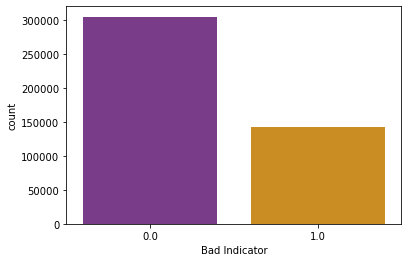

In [45]:
import seaborn as sns
sns.countplot(x='Bad Indicator', data=df, palette="CMRmap")
plt.show()

In [188]:
df.dtypes

Person_ID                           int64
Loan Account Number                object
Relationship_Start_Date    datetime64[ns]
OCCUPATION                         object
DATE_OF_BIRTH              datetime64[ns]
BUSINESS_TYPE                      object
STATE                              object
No_of_Mobile_No                     int64
CUSTOMER_EMAIL                     object
GENDER                             object
MARITAL_STATUS                     object
REGION                             object
BASIC_CURRENT                      object
BASIC_SAVINGS                      object
ATMCARD                            object
TOTAL_PRODUCTS                      int64
Loan_ID                            object
Loan Tenure                         int64
Payment Period                     object
Loan Amount (Principal)             int64
Loan Application Date      datetime64[ns]
Loan Approval Date         datetime64[ns]
Loan Disbursement Date     datetime64[ns]
Loan Maturity Date         datetim

### From above dataset, it shows class imbalance on target variable

In [186]:
###Duplicate data
df.duplicated().any()

True

In [33]:
###Looks like above data has duplicates.Let us remove the duplicates
df.drop_duplicates(subset=None, inplace=True)
df.duplicated().any()

False

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523340 entries, 0 to 608724
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Person_ID                523340 non-null  int64         
 1   Loan Account Number      523340 non-null  object        
 2   Relationship_Start_Date  523340 non-null  datetime64[ns]
 3   OCCUPATION               362537 non-null  object        
 4   DATE_OF_BIRTH            523340 non-null  datetime64[ns]
 5   BUSINESS_TYPE            268054 non-null  object        
 6   STATE                    523340 non-null  object        
 7   No_of_Mobile_No          523340 non-null  int64         
 8   CUSTOMER_EMAIL           523340 non-null  object        
 9   GENDER                   523340 non-null  object        
 10  MARITAL_STATUS           523340 non-null  object        
 11  REGION                   523340 non-null  object        
 12  BASIC_CURRENT   

In [35]:
df.isnull().sum()

Person_ID                       0
Loan Account Number             0
Relationship_Start_Date         0
OCCUPATION                 160803
DATE_OF_BIRTH                   0
BUSINESS_TYPE              255286
STATE                           0
No_of_Mobile_No                 0
CUSTOMER_EMAIL                  0
GENDER                          0
MARITAL_STATUS                  0
REGION                          0
BASIC_CURRENT                   0
BASIC_SAVINGS                   0
ATMCARD                         0
TOTAL_PRODUCTS                  0
Loan_ID                         0
Loan Tenure                     0
Payment Period                  0
Loan Amount (Principal)         0
Loan Application Date           0
Loan Approval Date              0
Loan Disbursement Date          0
Loan Maturity Date              0
Latest Known Status        136621
Ever 90dpd+                     0
Currently ≥ 60dpd          136621
Bad Indicator              136621
TRN_DT                          0
TRANS_TYPE    

In [36]:
print(round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False))

BUSINESS_TYPE              48.78
OCCUPATION                 30.73
Currently ≥ 60dpd          26.11
Latest Known Status        26.11
Bad Indicator              26.11
NARRATION                   0.02
TRN_DT                      0.00
TRANS_TYPE                  0.00
Loan Tenure                 0.00
Ever 90dpd+                 0.00
AMOUNT_IN_NAIRA             0.00
Loan Maturity Date          0.00
Loan Disbursement Date      0.00
Loan Approval Date          0.00
Loan Application Date       0.00
Loan Amount (Principal)     0.00
Payment Period              0.00
Person_ID                   0.00
Loan Account Number         0.00
TOTAL_PRODUCTS              0.00
ATMCARD                     0.00
BASIC_SAVINGS               0.00
BASIC_CURRENT               0.00
REGION                      0.00
MARITAL_STATUS              0.00
GENDER                      0.00
CUSTOMER_EMAIL              0.00
No_of_Mobile_No             0.00
STATE                       0.00
DATE_OF_BIRTH               0.00
Relationsh

In [37]:
#updated_df = df
df['Ever 90dpd+']=df['Ever 90dpd+'].fillna(df['Ever 90dpd+'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523340 entries, 0 to 608724
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Person_ID                523340 non-null  int64         
 1   Loan Account Number      523340 non-null  object        
 2   Relationship_Start_Date  523340 non-null  datetime64[ns]
 3   OCCUPATION               362537 non-null  object        
 4   DATE_OF_BIRTH            523340 non-null  datetime64[ns]
 5   BUSINESS_TYPE            268054 non-null  object        
 6   STATE                    523340 non-null  object        
 7   No_of_Mobile_No          523340 non-null  int64         
 8   CUSTOMER_EMAIL           523340 non-null  object        
 9   GENDER                   523340 non-null  object        
 10  MARITAL_STATUS           523340 non-null  object        
 11  REGION                   523340 non-null  object        
 12  BASIC_CURRENT   

In [38]:
## percentage of missing values in each column
print(round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False))
colmns_missing_data = round(100*(df.isnull().sum()/len(df.index)), 2)
colmns_missing_data[colmns_missing_data >= 10]

BUSINESS_TYPE              48.78
OCCUPATION                 30.73
Currently ≥ 60dpd          26.11
Latest Known Status        26.11
Bad Indicator              26.11
NARRATION                   0.02
TRN_DT                      0.00
TRANS_TYPE                  0.00
Loan Tenure                 0.00
Ever 90dpd+                 0.00
AMOUNT_IN_NAIRA             0.00
Loan Maturity Date          0.00
Loan Disbursement Date      0.00
Loan Approval Date          0.00
Loan Application Date       0.00
Loan Amount (Principal)     0.00
Payment Period              0.00
Person_ID                   0.00
Loan Account Number         0.00
TOTAL_PRODUCTS              0.00
ATMCARD                     0.00
BASIC_SAVINGS               0.00
BASIC_CURRENT               0.00
REGION                      0.00
MARITAL_STATUS              0.00
GENDER                      0.00
CUSTOMER_EMAIL              0.00
No_of_Mobile_No             0.00
STATE                       0.00
DATE_OF_BIRTH               0.00
Relationsh

OCCUPATION             30.73
BUSINESS_TYPE          48.78
Latest Known Status    26.11
Currently ≥ 60dpd      26.11
Bad Indicator          26.11
dtype: float64

In [39]:
df.shape

(523340, 32)

In [40]:
df['OCCUPATION'].value_counts()

Artisan                          108811
1                                 82310
Domestic trade retail             75742
OTHERS                            37083
BUSINESS                          13715
TRADING                            9984
SELF EMPLOYED                      9912
Self Employed                      7339
Business                           6478
CIVIL SERVANT                      1683
TRADER                             1172
MECHANIC                            774
STAFF                               684
TRADE                               673
STUDENT                             539
FARMING (POULTRY)                   413
BUSINESSMAN                         370
MASTER BAKER                        365
ARTISAN                             350
Unemployed                          305
CORPER                              304
BUSINESS MAN                        283
DRIVER                              255
ENGINEER                            233
Education                           220


In [41]:
df['BUSINESS_TYPE'].value_counts()

1                                126159
Artisan                           41087
OTHERS                            33892
SELF EMPLOYED                     23906
BUSINESS                          12508
STUDENT                            6200
CIVIL SERVANT                      4886
TRADING                            4751
Self Employed                      3150
Business                           2494
TEACHER                            2052
MECHANIC                            774
AGRICULTURIST                       728
SALES REPRESENTATIVE                688
TRADER                              635
ENGINEER                            472
STAFF                               388
WRITER                              314
DOCTOR                              313
CORPER                              304
CRAFTMAN                            276
TRADE                               231
SCIENTIST                           175
PUBLIC SERVANT                      156
Construction, Mining & Trades       152


In [39]:
df['Latest Known Status'].value_counts()

 Current (active no arrears)    220757
In Default                       97051
In arrears                       94638
Closed (fully repaid)            35750
Name: Latest Known Status, dtype: int64

In [41]:
df['Currently ≥ 60dpd'].value_counts()

0.0    309571
1.0    138625
Name: Currently ≥ 60dpd, dtype: int64

In [42]:
df['Bad Indicator'].value_counts()

0.0    305532
1.0    142664
Name: Bad Indicator, dtype: int64

In [43]:
df.isnull().sum()

Person_ID                       0
Loan Account Number             0
Relationship_Start_Date         0
OCCUPATION                 187564
DATE_OF_BIRTH                   0
BUSINESS_TYPE              296555
STATE                           0
No_of_Mobile_No                 0
CUSTOMER_EMAIL                  0
GENDER                          0
MARITAL_STATUS                  0
REGION                          0
BASIC_CURRENT                   0
BASIC_SAVINGS                   0
ATMCARD                         0
TOTAL_PRODUCTS                  0
Loan_ID                         0
Loan Tenure                     0
Payment Period                  0
Loan Amount (Principal)         0
Loan Application Date           0
Loan Approval Date              0
Loan Disbursement Date          0
Loan Maturity Date              0
Latest Known Status        160529
Ever 90dpd+                160529
Currently ≥ 60dpd          160529
Bad Indicator              160529
TRN_DT                          0
TRANS_TYPE    

In [42]:
print(round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False))

BUSINESS_TYPE              48.78
OCCUPATION                 30.73
Currently ≥ 60dpd          26.11
Latest Known Status        26.11
Bad Indicator              26.11
NARRATION                   0.02
TRN_DT                      0.00
TRANS_TYPE                  0.00
Loan Tenure                 0.00
Ever 90dpd+                 0.00
AMOUNT_IN_NAIRA             0.00
Loan Maturity Date          0.00
Loan Disbursement Date      0.00
Loan Approval Date          0.00
Loan Application Date       0.00
Loan Amount (Principal)     0.00
Payment Period              0.00
Person_ID                   0.00
Loan Account Number         0.00
TOTAL_PRODUCTS              0.00
ATMCARD                     0.00
BASIC_SAVINGS               0.00
BASIC_CURRENT               0.00
REGION                      0.00
MARITAL_STATUS              0.00
GENDER                      0.00
CUSTOMER_EMAIL              0.00
No_of_Mobile_No             0.00
STATE                       0.00
DATE_OF_BIRTH               0.00
Relationsh

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523340 entries, 0 to 608724
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Person_ID                523340 non-null  int64         
 1   Loan Account Number      523340 non-null  object        
 2   Relationship_Start_Date  523340 non-null  datetime64[ns]
 3   OCCUPATION               362537 non-null  object        
 4   DATE_OF_BIRTH            523340 non-null  datetime64[ns]
 5   BUSINESS_TYPE            268054 non-null  object        
 6   STATE                    523340 non-null  object        
 7   No_of_Mobile_No          523340 non-null  int64         
 8   CUSTOMER_EMAIL           523340 non-null  object        
 9   GENDER                   523340 non-null  object        
 10  MARITAL_STATUS           523340 non-null  object        
 11  REGION                   523340 non-null  object        
 12  BASIC_CURRENT   

In [51]:
df['BUSINESS_TYPE'].mode()[0]

'1'

In [52]:
#df['Ever 90dpd+']=df['Ever 90dpd+'].fillna(df['Ever 90dpd+'].mean())
#df['BUSINESS_TYPE']=df['BUSINESS_TYPE'].fillna(df['BUSINESS_TYPE'].mode())
#df['BUSINESS_TYPE']=
#print(df['BUSINESS_TYPE'].fillna(df['BUSINESS_TYPE'].mode()))
df['BUSINESS_TYPE']=df['BUSINESS_TYPE'].replace(np.nan, df['BUSINESS_TYPE'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523340 entries, 0 to 608724
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Person_ID                523340 non-null  int64         
 1   Loan Account Number      523340 non-null  object        
 2   Relationship_Start_Date  523340 non-null  datetime64[ns]
 3   OCCUPATION               362537 non-null  object        
 4   DATE_OF_BIRTH            523340 non-null  datetime64[ns]
 5   BUSINESS_TYPE            523340 non-null  object        
 6   STATE                    523340 non-null  object        
 7   No_of_Mobile_No          523340 non-null  int64         
 8   CUSTOMER_EMAIL           523340 non-null  object        
 9   GENDER                   523340 non-null  object        
 10  MARITAL_STATUS           523340 non-null  object        
 11  REGION                   523340 non-null  object        
 12  BASIC_CURRENT   

In [54]:
print(round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False))

OCCUPATION                 30.73
Bad Indicator              26.11
Currently ≥ 60dpd          26.11
Latest Known Status        26.11
NARRATION                   0.02
Loan Tenure                 0.00
AMOUNT_IN_NAIRA             0.00
TRANS_TYPE                  0.00
TRN_DT                      0.00
Ever 90dpd+                 0.00
Loan Maturity Date          0.00
Loan Disbursement Date      0.00
Loan Approval Date          0.00
Loan Application Date       0.00
Loan Amount (Principal)     0.00
Payment Period              0.00
Person_ID                   0.00
Loan Account Number         0.00
TOTAL_PRODUCTS              0.00
ATMCARD                     0.00
BASIC_SAVINGS               0.00
BASIC_CURRENT               0.00
REGION                      0.00
MARITAL_STATUS              0.00
GENDER                      0.00
CUSTOMER_EMAIL              0.00
No_of_Mobile_No             0.00
STATE                       0.00
BUSINESS_TYPE               0.00
DATE_OF_BIRTH               0.00
Relationsh

In [58]:
df['OCCUPATION'].mode()[0]

'Artisan'

In [59]:
df['OCCUPATION']=df['OCCUPATION'].replace(np.nan, df['OCCUPATION'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523340 entries, 0 to 608724
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Person_ID                523340 non-null  int64         
 1   Loan Account Number      523340 non-null  object        
 2   Relationship_Start_Date  523340 non-null  datetime64[ns]
 3   OCCUPATION               523340 non-null  object        
 4   DATE_OF_BIRTH            523340 non-null  datetime64[ns]
 5   BUSINESS_TYPE            523340 non-null  object        
 6   STATE                    523340 non-null  object        
 7   No_of_Mobile_No          523340 non-null  int64         
 8   CUSTOMER_EMAIL           523340 non-null  object        
 9   GENDER                   523340 non-null  object        
 10  MARITAL_STATUS           523340 non-null  object        
 11  REGION                   523340 non-null  object        
 12  BASIC_CURRENT   

In [66]:
df['Bad Indicator'].median()

0.0

In [69]:
df['Bad Indicator']=df['Bad Indicator'].replace(np.nan, df['Bad Indicator'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523340 entries, 0 to 608724
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Person_ID                523340 non-null  int64         
 1   Loan Account Number      523340 non-null  object        
 2   Relationship_Start_Date  523340 non-null  datetime64[ns]
 3   OCCUPATION               523340 non-null  object        
 4   DATE_OF_BIRTH            523340 non-null  datetime64[ns]
 5   BUSINESS_TYPE            523340 non-null  object        
 6   STATE                    523340 non-null  object        
 7   No_of_Mobile_No          523340 non-null  int64         
 8   CUSTOMER_EMAIL           523340 non-null  object        
 9   GENDER                   523340 non-null  object        
 10  MARITAL_STATUS           523340 non-null  object        
 11  REGION                   523340 non-null  object        
 12  BASIC_CURRENT   

In [70]:
df['Currently ≥ 60dpd']=df['Currently ≥ 60dpd'].replace(np.nan, df['Currently ≥ 60dpd'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523340 entries, 0 to 608724
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Person_ID                523340 non-null  int64         
 1   Loan Account Number      523340 non-null  object        
 2   Relationship_Start_Date  523340 non-null  datetime64[ns]
 3   OCCUPATION               523340 non-null  object        
 4   DATE_OF_BIRTH            523340 non-null  datetime64[ns]
 5   BUSINESS_TYPE            523340 non-null  object        
 6   STATE                    523340 non-null  object        
 7   No_of_Mobile_No          523340 non-null  int64         
 8   CUSTOMER_EMAIL           523340 non-null  object        
 9   GENDER                   523340 non-null  object        
 10  MARITAL_STATUS           523340 non-null  object        
 11  REGION                   523340 non-null  object        
 12  BASIC_CURRENT   

In [73]:
df['Latest Known Status'].mode()[0]

' Current (active no arrears)'

In [74]:
df['Currently ≥ 60dpd']=df['Currently ≥ 60dpd'].replace(np.nan, df['Currently ≥ 60dpd'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523340 entries, 0 to 608724
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Person_ID                523340 non-null  int64         
 1   Loan Account Number      523340 non-null  object        
 2   Relationship_Start_Date  523340 non-null  datetime64[ns]
 3   OCCUPATION               523340 non-null  object        
 4   DATE_OF_BIRTH            523340 non-null  datetime64[ns]
 5   BUSINESS_TYPE            523340 non-null  object        
 6   STATE                    523340 non-null  object        
 7   No_of_Mobile_No          523340 non-null  int64         
 8   CUSTOMER_EMAIL           523340 non-null  object        
 9   GENDER                   523340 non-null  object        
 10  MARITAL_STATUS           523340 non-null  object        
 11  REGION                   523340 non-null  object        
 12  BASIC_CURRENT   

In [75]:
df['Latest Known Status']=df['Latest Known Status'].replace(np.nan, df['Latest Known Status'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523340 entries, 0 to 608724
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Person_ID                523340 non-null  int64         
 1   Loan Account Number      523340 non-null  object        
 2   Relationship_Start_Date  523340 non-null  datetime64[ns]
 3   OCCUPATION               523340 non-null  object        
 4   DATE_OF_BIRTH            523340 non-null  datetime64[ns]
 5   BUSINESS_TYPE            523340 non-null  object        
 6   STATE                    523340 non-null  object        
 7   No_of_Mobile_No          523340 non-null  int64         
 8   CUSTOMER_EMAIL           523340 non-null  object        
 9   GENDER                   523340 non-null  object        
 10  MARITAL_STATUS           523340 non-null  object        
 11  REGION                   523340 non-null  object        
 12  BASIC_CURRENT   

In [77]:
df['NARRATION'].mode()[0]

'UIP Trf from xxxxxxxxxxxxxxxxxxxxxx'

In [78]:
df['NARRATION']=df['NARRATION'].replace(np.nan, df['NARRATION'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523340 entries, 0 to 608724
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Person_ID                523340 non-null  int64         
 1   Loan Account Number      523340 non-null  object        
 2   Relationship_Start_Date  523340 non-null  datetime64[ns]
 3   OCCUPATION               523340 non-null  object        
 4   DATE_OF_BIRTH            523340 non-null  datetime64[ns]
 5   BUSINESS_TYPE            523340 non-null  object        
 6   STATE                    523340 non-null  object        
 7   No_of_Mobile_No          523340 non-null  int64         
 8   CUSTOMER_EMAIL           523340 non-null  object        
 9   GENDER                   523340 non-null  object        
 10  MARITAL_STATUS           523340 non-null  object        
 11  REGION                   523340 non-null  object        
 12  BASIC_CURRENT   

In [79]:
df.isnull().sum()

Person_ID                  0
Loan Account Number        0
Relationship_Start_Date    0
OCCUPATION                 0
DATE_OF_BIRTH              0
BUSINESS_TYPE              0
STATE                      0
No_of_Mobile_No            0
CUSTOMER_EMAIL             0
GENDER                     0
MARITAL_STATUS             0
REGION                     0
BASIC_CURRENT              0
BASIC_SAVINGS              0
ATMCARD                    0
TOTAL_PRODUCTS             0
Loan_ID                    0
Loan Tenure                0
Payment Period             0
Loan Amount (Principal)    0
Loan Application Date      0
Loan Approval Date         0
Loan Disbursement Date     0
Loan Maturity Date         0
Latest Known Status        0
Ever 90dpd+                0
Currently ≥ 60dpd          0
Bad Indicator              0
TRN_DT                     0
TRANS_TYPE                 0
AMOUNT_IN_NAIRA            0
NARRATION                  0
dtype: int64

In [80]:
# All these columns has more than 50% missing values

print(df.OCCUPATION.describe()); print_ln()
print(df.BUSINESS_TYPE.describe()); print_ln()
#print(df.Latest Known Status.describe()); print_ln()
#print(df.Currently ≥ 60dpd.describe()); print_ln()

count      523340
unique         49
top       Artisan
freq       269614
Name: OCCUPATION, dtype: object
-------------------------------------------------------------------------------- 

count     523340
unique        38
top            1
freq      381445
Name: BUSINESS_TYPE, dtype: object
-------------------------------------------------------------------------------- 



In [81]:
print(df.isnull().sum())

Person_ID                  0
Loan Account Number        0
Relationship_Start_Date    0
OCCUPATION                 0
DATE_OF_BIRTH              0
BUSINESS_TYPE              0
STATE                      0
No_of_Mobile_No            0
CUSTOMER_EMAIL             0
GENDER                     0
MARITAL_STATUS             0
REGION                     0
BASIC_CURRENT              0
BASIC_SAVINGS              0
ATMCARD                    0
TOTAL_PRODUCTS             0
Loan_ID                    0
Loan Tenure                0
Payment Period             0
Loan Amount (Principal)    0
Loan Application Date      0
Loan Approval Date         0
Loan Disbursement Date     0
Loan Maturity Date         0
Latest Known Status        0
Ever 90dpd+                0
Currently ≥ 60dpd          0
Bad Indicator              0
TRN_DT                     0
TRANS_TYPE                 0
AMOUNT_IN_NAIRA            0
NARRATION                  0
dtype: int64


In [82]:
print(round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False))

Person_ID                  0.0
Loan Account Number        0.0
AMOUNT_IN_NAIRA            0.0
TRANS_TYPE                 0.0
TRN_DT                     0.0
Bad Indicator              0.0
Currently ≥ 60dpd          0.0
Ever 90dpd+                0.0
Latest Known Status        0.0
Loan Maturity Date         0.0
Loan Disbursement Date     0.0
Loan Approval Date         0.0
Loan Application Date      0.0
Loan Amount (Principal)    0.0
Payment Period             0.0
Loan Tenure                0.0
Loan_ID                    0.0
TOTAL_PRODUCTS             0.0
ATMCARD                    0.0
BASIC_SAVINGS              0.0
BASIC_CURRENT              0.0
REGION                     0.0
MARITAL_STATUS             0.0
GENDER                     0.0
CUSTOMER_EMAIL             0.0
No_of_Mobile_No            0.0
STATE                      0.0
BUSINESS_TYPE              0.0
DATE_OF_BIRTH              0.0
OCCUPATION                 0.0
Relationship_Start_Date    0.0
NARRATION                  0.0
dtype: f

In [83]:
df.shape

(523340, 32)

In [84]:
df['Bad Indicator'].value_counts()

0.0    399993
1.0    123347
Name: Bad Indicator, dtype: int64

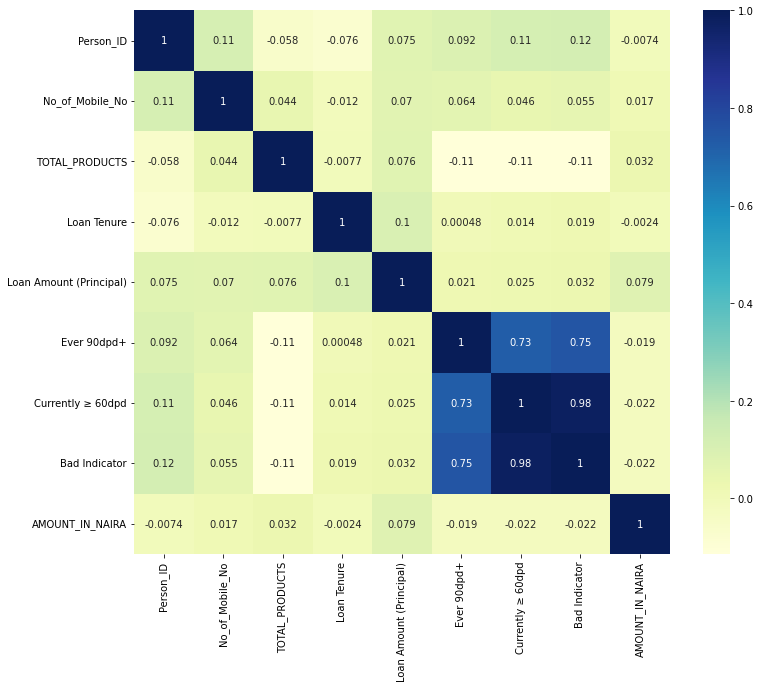

In [85]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [90]:
#observe the different feature type present in the data
df.dtypes

Person_ID                           int64
Loan Account Number                object
Relationship_Start_Date    datetime64[ns]
OCCUPATION                         object
DATE_OF_BIRTH              datetime64[ns]
BUSINESS_TYPE                      object
STATE                              object
No_of_Mobile_No                     int64
CUSTOMER_EMAIL                     object
GENDER                             object
MARITAL_STATUS                     object
REGION                             object
BASIC_CURRENT                      object
BASIC_SAVINGS                      object
ATMCARD                            object
TOTAL_PRODUCTS                      int64
Loan_ID                            object
Loan Tenure                         int64
Payment Period                     object
Loan Amount (Principal)             int64
Loan Application Date      datetime64[ns]
Loan Approval Date         datetime64[ns]
Loan Disbursement Date     datetime64[ns]
Loan Maturity Date         datetim

In [92]:
df.columns

Index(['Person_ID', 'Loan Account Number', 'Relationship_Start_Date',
       'OCCUPATION', 'DATE_OF_BIRTH', 'BUSINESS_TYPE', 'STATE',
       'No_of_Mobile_No', 'CUSTOMER_EMAIL', 'GENDER', 'MARITAL_STATUS',
       'REGION', 'BASIC_CURRENT', 'BASIC_SAVINGS', 'ATMCARD', 'TOTAL_PRODUCTS',
       'Loan_ID', 'Loan Tenure', 'Payment Period', 'Loan Amount (Principal)',
       'Loan Application Date', 'Loan Approval Date', 'Loan Disbursement Date',
       'Loan Maturity Date', 'Latest Known Status', 'Ever 90dpd+',
       'Currently ≥ 60dpd', 'Bad Indicator', 'TRN_DT', 'TRANS_TYPE',
       'AMOUNT_IN_NAIRA', 'NARRATION'],
      dtype='object')

### ONE HOT ENCODING

Since we have many categorical values withn the data, we would need to do one-hot encoding to convert the categorical values to discrete real values for a better noise-free analysis

In [48]:
def encode_features(df, features):
    '''
    Method for one-hot encoding all selected categorical fields
    '''
    for f in features:
        if(f in df.columns):
            encoded = pd.get_dummies(df[f])
            encoded = encoded.add_prefix(f + '_')
            df = pd.concat([df, encoded], axis=1)
        else:
            print('Feature not found')
            return df
        
    df.drop(columns=features, inplace = True)
    
    return df

In [49]:
features_to_encode = ['Latest Known Status', 'MARITAL_STATUS', 'REGION', 'GENDER']
encoded = encode_features(df, features_to_encode)
data = encoded.copy()
print(data.shape)

(608725, 48)


In [50]:
data.columns

Index(['Person_ID', 'Loan Account Number', 'Relationship_Start_Date',
       'OCCUPATION', 'DATE_OF_BIRTH', 'BUSINESS_TYPE', 'STATE',
       'No_of_Mobile_No', 'CUSTOMER_EMAIL', 'BASIC_CURRENT', 'BASIC_SAVINGS',
       'ATMCARD', 'TOTAL_PRODUCTS', 'Loan_ID', 'Loan Tenure', 'Payment Period',
       'Loan Amount (Principal)', 'Loan Application Date',
       'Loan Approval Date', 'Loan Disbursement Date', 'Loan Maturity Date',
       'Ever 90dpd+', 'Currently ≥ 60dpd', 'Bad Indicator', 'TRN_DT',
       'TRANS_TYPE', 'AMOUNT_IN_NAIRA', 'NARRATION',
       'Latest Known Status_ Current (active no arrears)',
       'Latest Known Status_Closed (fully repaid)',
       'Latest Known Status_In Default', 'Latest Known Status_In arrears',
       'MARITAL_STATUS_0', 'MARITAL_STATUS_Divorced', 'MARITAL_STATUS_Married',
       'MARITAL_STATUS_Seperated', 'MARITAL_STATUS_Single',
       'MARITAL_STATUS_Spouse_Expired', 'REGION_ABUJA', 'REGION_HEAD_OFFICE',
       'REGION_LAGOS_ISLAND', 'REGION_LAGOS_M

In [51]:
df.columns

Index(['Person_ID', 'Loan Account Number', 'Relationship_Start_Date',
       'OCCUPATION', 'DATE_OF_BIRTH', 'BUSINESS_TYPE', 'STATE',
       'No_of_Mobile_No', 'CUSTOMER_EMAIL', 'GENDER', 'MARITAL_STATUS',
       'REGION', 'BASIC_CURRENT', 'BASIC_SAVINGS', 'ATMCARD', 'TOTAL_PRODUCTS',
       'Loan_ID', 'Loan Tenure', 'Payment Period', 'Loan Amount (Principal)',
       'Loan Application Date', 'Loan Approval Date', 'Loan Disbursement Date',
       'Loan Maturity Date', 'Latest Known Status', 'Ever 90dpd+',
       'Currently ≥ 60dpd', 'Bad Indicator', 'TRN_DT', 'TRANS_TYPE',
       'AMOUNT_IN_NAIRA', 'NARRATION'],
      dtype='object')

After one hot encoding we see that 16 new columns are added and the 4 categorical columns are dropped

### Outliner Inspection

In [52]:
data.describe()

,Person_ID,No_of_Mobile_No,TOTAL_PRODUCTS,Loan Tenure,Loan Amount (Principal),Ever 90dpd+,Currently ≥ 60dpd,Bad Indicator,AMOUNT_IN_NAIRA,Latest Known Status_ Current (active no arrears),...,REGION_ABUJA,REGION_HEAD_OFFICE,REGION_LAGOS_ISLAND,REGION_LAGOS_MAINLAND,REGION_NORTH,REGION_SOUTH,REGION_WEST,GENDER_F,GENDER_M,GENDER_P
count,6.087250e+05,608725.000000,608725.000000,608725.000000,608725.000000,448196.000000,448196.000000,448196.000000,6.087250e+05,608725.000000,...,608725.000000,608725.000000,608725.000000,608725.000000,608725.000000,608725.000000,608725.000000,608725.000000,608725.000000,608725.000000
mean,6.357631e+06,1.076836,1.919878,11.238265,227261.920391,0.227447,0.309295,0.318307,2.738425e+04,0.362655,...,0.049071,0.015135,0.048947,0.213880,0.124084,0.222675,0.326208,0.228796,0.768641,0.002563
std,2.001543e+06,0.266331,2.531561,2.127839,122958.647868,0.419184,0.462204,0.465820,1.226310e+05,0.480767,...,0.216017,0.122090,0.215757,0.410043,0.329678,0.416042,0.468825,0.420058,0.421702,0.050559
min,8.280100e+04,1.000000,0.000000,2.000000,10000.000000,0.000000,0.000000,0.000000,-5.000000e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.303229e+06,1.000000,0.000000,12.000000,145000.000000,0.000000,0.000000,0.000000,1.000000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,6.695806e+06,1.000000,1.000000,12.000000,149000.000000,0.000000,0.000000,0.000000,6.000000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.012117e+06,1.000000,3.000000,12.000000,350000.000000,0.000000,1.000000,1.000000,2.000000e+04,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,8.977774e+06,2.000000,45.000000,24.000000,1000000.000000,1.000000,1.000000,1.000000,3.040000e+07,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Data Correleation

Person_ID                                           0.141522
No_of_Mobile_No                                     0.060532
TOTAL_PRODUCTS                                     -0.155778
Loan Tenure                                         0.018378
Loan Amount (Principal)                             0.047881
Ever 90dpd+                                         0.794049
Currently ≥ 60dpd                                   0.979291
Bad Indicator                                       1.000000
AMOUNT_IN_NAIRA                                    -0.028756
Latest Known Status_ Current (active no arrears)   -0.650011
Latest Known Status_Closed (fully repaid)          -0.195770
Latest Known Status_In Default                      0.769357
Latest Known Status_In arrears                      0.149763
MARITAL_STATUS_0                                    0.009949
MARITAL_STATUS_Divorced                            -0.051753
MARITAL_STATUS_Married                              0.037169
MARITAL_STATUS_Seperated

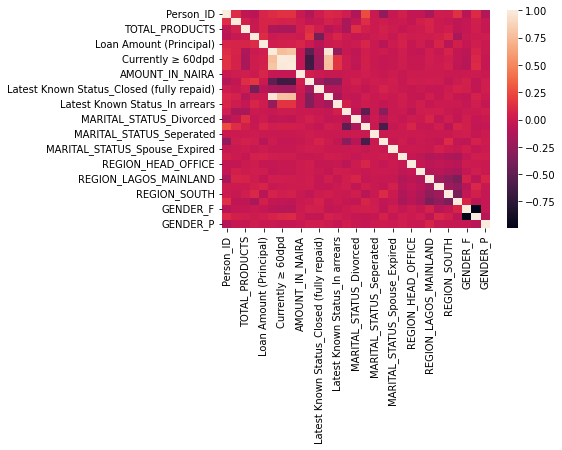

In [53]:
print(data.corr()['Bad Indicator'])
sns.heatmap(data.corr())
plt.show()

It is observed that below  features does have a strong correlation (>0.6) with the target.So we need to remove  correlated or inversely correlated values to remove any additional training bias.
##### Person_ID                                           
##### Ever 90dpd+          
##### Currently ≥ 60dpd
##### Latest Known Status_In Default

In [54]:
#data = df.drop(columns = 'Ever 90dpd+')

Person_ID                                           0.141522
No_of_Mobile_No                                     0.060532
TOTAL_PRODUCTS                                     -0.155778
Loan Tenure                                         0.018378
Loan Amount (Principal)                             0.047881
Ever 90dpd+                                         0.794049
Currently ≥ 60dpd                                   0.979291
Bad Indicator                                       1.000000
AMOUNT_IN_NAIRA                                    -0.028756
Latest Known Status_ Current (active no arrears)   -0.650011
Latest Known Status_Closed (fully repaid)          -0.195770
Latest Known Status_In Default                      0.769357
Latest Known Status_In arrears                      0.149763
MARITAL_STATUS_0                                    0.009949
MARITAL_STATUS_Divorced                            -0.051753
MARITAL_STATUS_Married                              0.037169
MARITAL_STATUS_Seperated

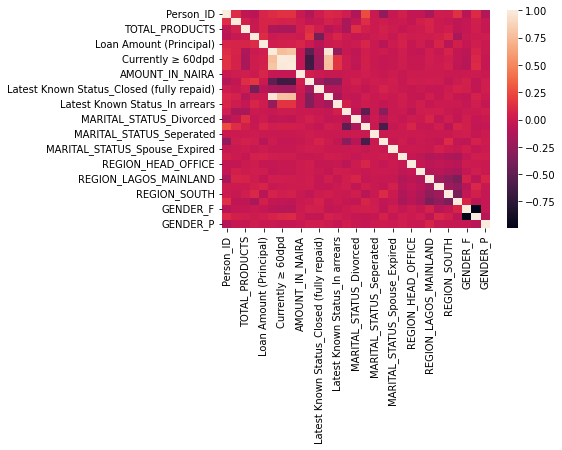

In [55]:
print(data.corr()['Bad Indicator'])
sns.heatmap(data.corr())
plt.show()

###  Feature Engineering

#### In this step we will remove outliers on non categorical fields using Nelson's 1st rule and normalize the data for a better model generalization and efficiency.

In [56]:
data.describe()

,Person_ID,No_of_Mobile_No,TOTAL_PRODUCTS,Loan Tenure,Loan Amount (Principal),Ever 90dpd+,Currently ≥ 60dpd,Bad Indicator,AMOUNT_IN_NAIRA,Latest Known Status_ Current (active no arrears),...,REGION_ABUJA,REGION_HEAD_OFFICE,REGION_LAGOS_ISLAND,REGION_LAGOS_MAINLAND,REGION_NORTH,REGION_SOUTH,REGION_WEST,GENDER_F,GENDER_M,GENDER_P
count,6.087250e+05,608725.000000,608725.000000,608725.000000,608725.000000,448196.000000,448196.000000,448196.000000,6.087250e+05,608725.000000,...,608725.000000,608725.000000,608725.000000,608725.000000,608725.000000,608725.000000,608725.000000,608725.000000,608725.000000,608725.000000
mean,6.357631e+06,1.076836,1.919878,11.238265,227261.920391,0.227447,0.309295,0.318307,2.738425e+04,0.362655,...,0.049071,0.015135,0.048947,0.213880,0.124084,0.222675,0.326208,0.228796,0.768641,0.002563
std,2.001543e+06,0.266331,2.531561,2.127839,122958.647868,0.419184,0.462204,0.465820,1.226310e+05,0.480767,...,0.216017,0.122090,0.215757,0.410043,0.329678,0.416042,0.468825,0.420058,0.421702,0.050559
min,8.280100e+04,1.000000,0.000000,2.000000,10000.000000,0.000000,0.000000,0.000000,-5.000000e+05,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.303229e+06,1.000000,0.000000,12.000000,145000.000000,0.000000,0.000000,0.000000,1.000000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,6.695806e+06,1.000000,1.000000,12.000000,149000.000000,0.000000,0.000000,0.000000,6.000000e+03,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,8.012117e+06,1.000000,3.000000,12.000000,350000.000000,0.000000,1.000000,1.000000,2.000000e+04,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,8.977774e+06,2.000000,45.000000,24.000000,1000000.000000,1.000000,1.000000,1.000000,3.040000e+07,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
data.dtypes

Person_ID                                                    int64
Loan Account Number                                         object
Relationship_Start_Date                             datetime64[ns]
OCCUPATION                                                  object
DATE_OF_BIRTH                                       datetime64[ns]
BUSINESS_TYPE                                               object
STATE                                                       object
No_of_Mobile_No                                              int64
CUSTOMER_EMAIL                                              object
BASIC_CURRENT                                               object
BASIC_SAVINGS                                               object
ATMCARD                                                     object
TOTAL_PRODUCTS                                               int64
Loan_ID                                                     object
Loan Tenure                                                  i

In [58]:
feature_engg_data = data.copy()
outlier_data = data.copy()
target_index = data.columns.get_loc("Bad Indicator") # Use this for separating the target labels from data
factor = 3
# Include this only for columns with suspected outliers
# Using a factor of 3, following Nelson's rule 1 to remove outliers - https://en.wikipedia.org/wiki/Nelson_rules
# Only for non-categorical fields
columns_to_include = ['TOTAL_PRODUCTS', 'Loan Amount (Principal)','No_of_Mobile_No']
for column in columns_to_include:
    upper_lim = feature_engg_data[column].mean () + feature_engg_data[column].std () * factor
    lower_lim = feature_engg_data[column].mean () - feature_engg_data[column].std () * factor
    feature_engg_data = feature_engg_data[(feature_engg_data[column] < upper_lim) & (feature_engg_data[column] > lower_lim)]
    
outlier_data = pd.concat([outlier_data, feature_engg_data]).drop_duplicates(keep=False)

In [59]:
print(feature_engg_data.shape)
print(outlier_data.shape)

(552642, 48)
(44264, 48)


#### In the following section in-order to build the model, we will need to normalize the data and split the data into train, validation and test dataset. The outlier data that we have, we will keep it separate, just in case to see how does our model performs on the outlier dataset.

In [60]:
from sklearn import preprocessing

def normalize_data(df):
    val = df.values 
    min_max_normalizer = preprocessing.MinMaxScaler()
    #norm_val = min_max_normalizer.fit_transform(val)
    norm_val = min_max_normalizer.fit(val)
    df2 = pd.DataFrame(norm_val)
    
    return df2

norm_feature_engg_data = normalize_data(feature_engg_data)
norm_outlier_data = normalize_data(outlier_data)

ValueError: could not convert string to float: '346Z700193290001'

In [ ]:
norm_feature_engg_data = normalize_data(feature_engg_data)
norm_outlier_data = normalize_data(outlier_data)